In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
shp = (25,25)
img = np.floor(np.random.random(shp) + 0.5)

In [3]:
def plot(out):
    fig, ax = plt.subplots(figsize=(20,10))

    ax.imshow(out)
    for i in range(shp[0]):
        for j in range(shp[1]):
            c = out[j,i]
            ax.text(i, j, str(c), va='center', ha='center')

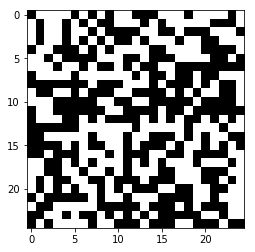

In [4]:
fig = plt.figure(100)
fig.canvas.set_window_title('Main')
plt.imshow(img, cmap="Greys")

In [5]:
def first_pass(img):
    
    
    label=1
    
    
    for i in range(shp[0]):
        for j in range(shp[1]):
            if img[i][j]==1:
                continue
            if i==0 and j==0:
                out[i][j] = label
                if label not in parents:
                    parents[label]=label
                label+=1
            elif i==0:
                if out[i][j-1]==0:
                    out[i][j] = label
                    if label not in parents:
                        parents[label]=label
                    label+=1
                else:
                    out[i][j] = out[i][j-1]
            elif j==0:
                if out[i-1][j-1]==0:
                    out[i][j] = label
                    if label not in parents:
                        parents[label]=label
                    label+=1
                else:
                    out[i][j] = out[i-1][j]
            else:
                if out[i-1][j]==0 and out[i][j-1]==0:
                    out[i][j] = label
                    if label not in parents:
                        parents[label]=label
                    label+=1
                elif out[i-1][j]==0:
                    out[i][j] = out[i][j-1]
                elif out[i][j-1]==0:
                    out[i][j] = out[i-1][j]
                else:
                    out[i][j] = min(out[i-1][j],out[i][j-1])
                    parent1 = parents[out[i-1][j]]
                    current1 = out[i-1][j]
                    while parent1!=current1:
                        current1 = parent1
                        parent1=parents[current1]
                    
                    parent2 = parents[out[i][j-1]]
                    current2 = out[i][j-1]
                    while parent2!=current2:
                        current2 = parent2
                        parent2=parents[current2]
                    
                    parents[out[i-1][j]] = min(parent1,parent2)
                    parents[out[i][j-1]] = min(parent1,parent2)

In [6]:
def second_pass(out):
    
    for i in range(shp[0]):
        for j in range(shp[1]):
            if out[i][j]==0:
                continue
            else:
                if parents[out[i][j]]==out[i][j]:
                    continue
                else:
                    parent = parents[out[i][j]]
                    current = out[i][j]
                    while parent!=current:
                        current = parent
                        parent=parents[current]
                    parents[out[i][j]] = parent
                    out[i][j] = parent
                        

In [7]:
def replace(out):
    
    for i in range(shp[0]):
        for j in range(shp[1]):
            if out[i][j]==0:
                continue
            out[i][j] = final_components[out[i][j]]

In [8]:
def final_list_gen(parents):
    for key,value in parents.items():
        if key==value:
            final_list.append(key)
        else:
            continue

In [9]:
def final_components_gen(final_list):
    for i in range(1,len(final_list)+1):
        final_components[final_list[i-1]] = i

In [10]:
parents = {
        1:1
    }
out = np.zeros(shp,dtype=int)

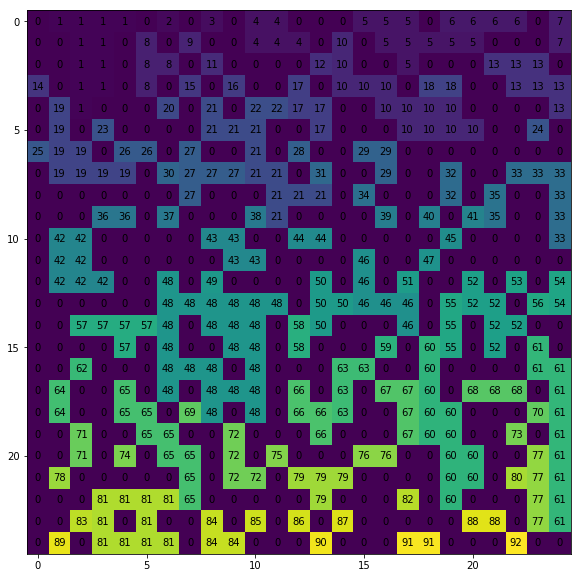

In [11]:
first_pass(img)
plot(out)

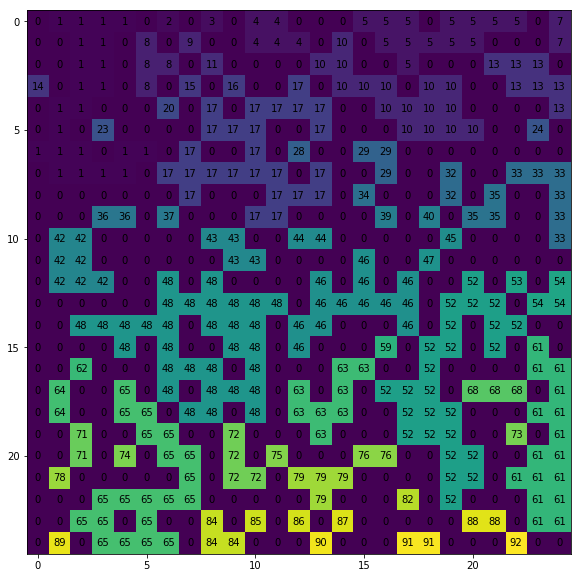

In [12]:
second_pass(out)
plot(out)

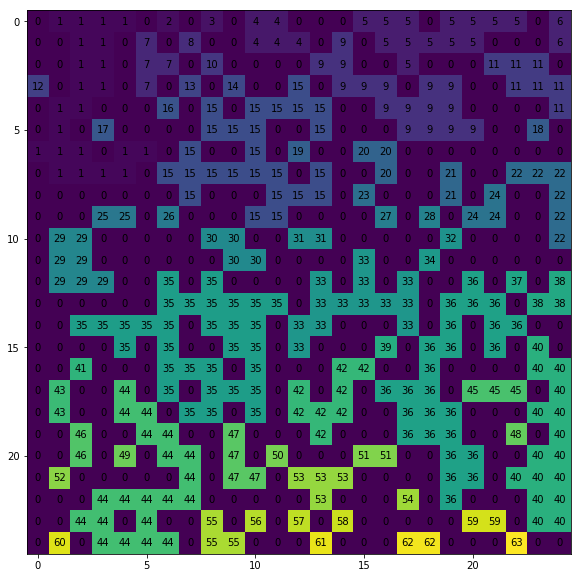

In [13]:
final_list = []
final_list_gen(parents)
final_components = {}
final_components_gen(final_list)
replace(out)
plot(out)

In [14]:
parents

{1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 5,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 10,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 10,
 19: 1,
 20: 20,
 21: 17,
 22: 17,
 23: 23,
 24: 24,
 25: 1,
 26: 1,
 27: 17,
 28: 28,
 29: 29,
 30: 17,
 31: 17,
 32: 32,
 33: 33,
 34: 34,
 35: 35,
 36: 36,
 37: 37,
 38: 17,
 39: 39,
 40: 40,
 41: 35,
 42: 42,
 43: 43,
 44: 44,
 45: 45,
 46: 46,
 47: 47,
 48: 48,
 49: 48,
 50: 46,
 51: 46,
 52: 52,
 53: 53,
 54: 54,
 55: 52,
 56: 54,
 57: 48,
 58: 46,
 59: 59,
 60: 52,
 61: 61,
 62: 62,
 63: 63,
 64: 64,
 65: 65,
 66: 63,
 67: 52,
 68: 68,
 69: 48,
 70: 61,
 71: 71,
 72: 72,
 73: 73,
 74: 74,
 75: 75,
 76: 76,
 77: 61,
 78: 78,
 79: 79,
 80: 61,
 81: 65,
 82: 82,
 83: 65,
 84: 84,
 85: 85,
 86: 86,
 87: 87,
 88: 88,
 89: 89,
 90: 90,
 91: 91,
 92: 92}

In [15]:
final_components

{1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 7: 6,
 8: 7,
 9: 8,
 10: 9,
 11: 10,
 13: 11,
 14: 12,
 15: 13,
 16: 14,
 17: 15,
 20: 16,
 23: 17,
 24: 18,
 28: 19,
 29: 20,
 32: 21,
 33: 22,
 34: 23,
 35: 24,
 36: 25,
 37: 26,
 39: 27,
 40: 28,
 42: 29,
 43: 30,
 44: 31,
 45: 32,
 46: 33,
 47: 34,
 48: 35,
 52: 36,
 53: 37,
 54: 38,
 59: 39,
 61: 40,
 62: 41,
 63: 42,
 64: 43,
 65: 44,
 68: 45,
 71: 46,
 72: 47,
 73: 48,
 74: 49,
 75: 50,
 76: 51,
 78: 52,
 79: 53,
 82: 54,
 84: 55,
 85: 56,
 86: 57,
 87: 58,
 88: 59,
 89: 60,
 90: 61,
 91: 62,
 92: 63}

In [16]:
print("Number of components:", len(final_components.keys()))

Number of components: 63


In [17]:
size = {}

def find_size(out):
    for i in range(shp[0]):
        for j in range(shp[1]):
            if out[i][j]==0:
                continue
            value = out[i][j]
            if value not in size.keys():
                size[value] = 1
            else:
                size[value]+=1

In [18]:
find_size(out)
size

{1: 22,
 2: 1,
 3: 1,
 4: 5,
 5: 13,
 6: 2,
 7: 4,
 8: 1,
 9: 16,
 10: 1,
 11: 7,
 12: 1,
 13: 1,
 14: 1,
 15: 25,
 16: 1,
 17: 1,
 18: 1,
 19: 1,
 20: 3,
 21: 2,
 22: 6,
 23: 1,
 24: 3,
 25: 2,
 26: 1,
 27: 1,
 28: 1,
 29: 7,
 30: 4,
 31: 2,
 32: 1,
 33: 13,
 34: 1,
 35: 31,
 36: 25,
 37: 1,
 38: 3,
 39: 1,
 40: 16,
 41: 1,
 42: 8,
 43: 2,
 44: 20,
 45: 3,
 46: 2,
 47: 4,
 48: 1,
 49: 1,
 50: 1,
 51: 2,
 52: 1,
 53: 4,
 54: 1,
 55: 3,
 56: 1,
 57: 1,
 58: 1,
 59: 2,
 60: 1,
 61: 1,
 62: 2,
 63: 1}